In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Libraries for Style
from colorama import Fore
from colorama import Style

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.drop(index=[2614], inplace =True)

In [6]:
df.shape

(15914, 23)

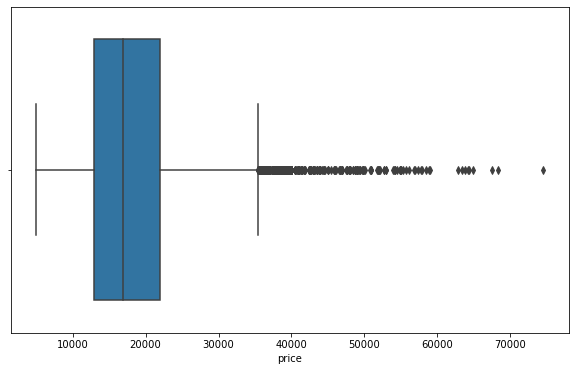

In [7]:
sns.boxplot(df.price);

In [8]:
len(df[df.price > 35000])

495

In [9]:
df = df[~(df.price>35000)]

In [10]:
df_new = df[["make_model", "hp_kW", "km","age", "price", "Gearing_Type", "Gears"]]

In [11]:
df_new.head()

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000


In [12]:
# df_new.to_csv('feature_selected_df.csv', index=False)

In [13]:
df_new.select_dtypes('object').columns

Index(['make_model', 'Gearing_Type'], dtype='object')

In [14]:
X = df_new.drop('price',axis=1)
y = df_new['price']

cat = X.select_dtypes("object").columns

In [15]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,0.000,66.000,56013.000,3.000,0.000,7.000
1,0.000,141.000,80000.000,2.000,0.000,7.000
2,0.000,85.000,83450.000,3.000,0.000,7.000
3,0.000,66.000,73000.000,3.000,0.000,6.000
4,0.000,66.000,16200.000,3.000,0.000,7.000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12335, 6)
Train target shape   :  (12335,)
Test features shape  :  (3084, 6)
Test target shape    :  (3084,)


### Random Forest

In [18]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [19]:
RF_model = RandomForestRegressor(random_state=101)
RF_model.fit(X_train,y_train)

RandomForestRegressor(random_state=101)

In [20]:
train_val(RF_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.979,0.927
mae,516.450,1072.928
mse,786697.263,2677210.332
rmse,886.960,1636.218


#### Cross Validation

In [21]:
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                   0.935
test_neg_mean_absolute_error          -1020.116
test_neg_mean_squared_error        -2461194.262
test_neg_root_mean_squared_error      -1567.824
dtype: float64

#### GridSearch

In [22]:
RF_grid_model = RandomForestRegressor(max_depth=10, n_estimators=64,random_state=101)

In [23]:
RF_grid_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=64, random_state=101)

In [24]:
train_val(RF_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.956,0.927
mae,908.930,1103.023
mse,1682431.037,2645012.616
rmse,1297.086,1626.349


### XGBoost

In [25]:
xgb_model = XGBRegressor(random_state=101)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.965,0.933
mae,801.806,1058.860
mse,1333206.198,2426907.214
rmse,1154.645,1557.853


#### Cross Validation

In [27]:
model = XGBRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                                   0.941
test_neg_mean_absolute_error          -1011.226
test_neg_mean_squared_error        -2230454.310
test_neg_root_mean_squared_error      -1492.611
dtype: float64

#### GridSearch

In [28]:
xgboost_grid_model = XGBRegressor(learning_rate=0.3, max_depth=5, max_features=None, n_estimators=128,
                                  subsample=0.8, random_state=101)

In [29]:
xgboost_grid_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=5, max_features=None, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=128, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
train_val(xgboost_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.961,0.934
mae,855.757,1058.130
mse,1491654.858,2398105.156
rmse,1221.333,1548.582


### Final Model

In [31]:
final_model_rf = RandomForestRegressor(max_depth=10, n_estimators=64,random_state=101).fit(X, y)

In [32]:
final_model_xgb = XGBRegressor(learning_rate=0.3, max_depth=5, max_features=None, n_estimators=128,
                                  subsample=0.8, random_state=101).fit(X, y)

In [33]:
import pickle
pickle.dump(final_model_rf, open("streamlit_final_rf", 'wb'))

In [34]:
pickle.dump(final_model_xgb, open("streamlit_final_xgb", 'wb'))

In [37]:
new_df = {'make_model':'Renault Espace',
              'hp_kW':239,
              'km':2000,
              'age':0,
              'Gearing_Type':'Semi-automatic',
              'Gears':8}

In [45]:
data2 = df_new.drop('price', axis=1)

In [46]:
data2.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000


In [47]:
features = pd.DataFrame(new_df, index=[0])

In [48]:
use_df = pd.concat([features, data2], axis=0)

In [49]:
cat = data2.select_dtypes('object').columns

In [50]:
enc = OrdinalEncoder()

In [51]:
use_df[cat] = enc.fit_transform(use_df[cat])

In [52]:
real_df = use_df[:1]

In [53]:
load_pickle = pickle.load(open('streamlit_final_rf', 'rb'))

In [54]:
prediction = load_pickle.predict(real_df)

In [55]:
prediction

array([30526.10561627])

In [57]:
final_model_rf.predict(real_df)

array([30526.10561627])

In [58]:
final_model_xgb.predict(real_df)

array([33713.59], dtype=float32)